# Analysis of TEBD on the Ising Model

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

from tebd.tebd import run_tebd

In [2]:
model_name = 'ising'

## Effect of $\lambda$

In [3]:
Ns = [3, 6, 9, 12]

In [4]:
lmdas = np.linspace(0, 2, 20)

In [5]:
observables = ['energy']

In [6]:
energies_N_lmda = np.zeros((len(Ns), len(lmdas)))

with tqdm(total=len(Ns) * len(lmdas)) as pbar:
    for i in range(len(Ns)):
        for j in range(len(lmdas)):
            model_params = {"lmda": lmdas[j]}
            observables_at_midsteps = run_tebd(
                model_name, model_params, Ns[i], observables=observables, print_to_stdout=False
            )
            energies_N_lmda[i, j] = observables_at_midsteps["energy"][-1]
            pbar.update(1)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 80/80 [06:26<00:00,  4.83s/it]


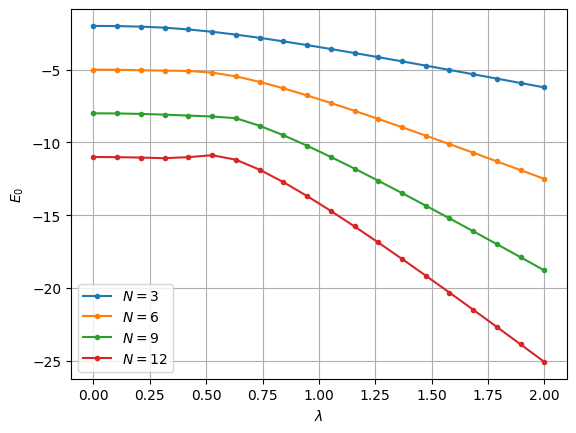

In [7]:
plt.plot(lmdas, energies_N_lmda[0], 'o-', markersize=3, label=f"$N = {Ns[0]}$")
plt.plot(lmdas, energies_N_lmda[1], 'o-', markersize=3, label=f"$N = {Ns[1]}$")
plt.plot(lmdas, energies_N_lmda[2], 'o-', markersize=3, label=f"$N = {Ns[2]}$")
plt.plot(lmdas, energies_N_lmda[3], 'o-', markersize=3, label=f"$N = {Ns[3]}$")
plt.xlabel("$\lambda$")
plt.ylabel("$E_0$")
plt.legend()
plt.grid()
plt.savefig('../figures/energy_vs_lambda_diff_N.png', bbox_inches='tight', dpi=300);

As $N$ increases, the energy goes down. The energy also decreases with $\lambda$ as all spins align down with respect to the magnetic field. There is a phase transition at $\lambda = 1$.

## Effect of $N$

Consider the $\lambda=0$ case.

In [8]:
Ns = range(3, 15)

In [9]:
model_params = {}

In [10]:
energies_theor = [-N + 1 for N in Ns]

In [11]:
energies_N = np.zeros(len(Ns))

for i in tqdm(range(len(Ns))):
    observables_at_midsteps = run_tebd(
        model_name, model_params, Ns[i], observables=observables, print_to_stdout=False
    )
    energies_N[i] = observables_at_midsteps['energy'][-1]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [09:57<00:00, 49.75s/it]


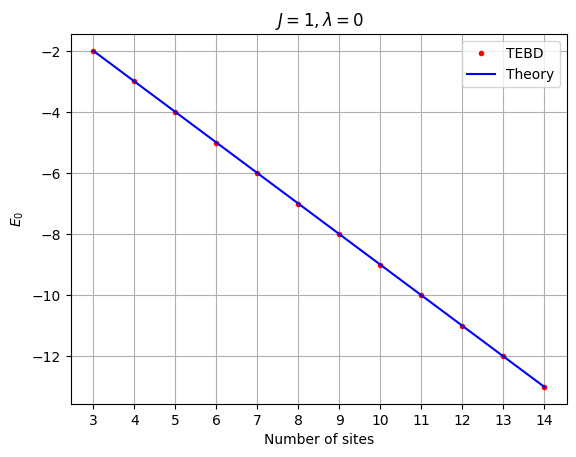

In [12]:
plt.plot(Ns, energies_N, 'ro', markersize=3, label="TEBD")
plt.plot(Ns, energies_theor, "b-", label="Theory")
plt.xlabel("Number of sites")
plt.ylabel("$E_0$")
plt.xticks(Ns)
plt.legend()
plt.title("$J = 1, \lambda=0$")
plt.grid()
plt.savefig('../figures/energy_vs_N_lambda_0.png', bbox_inches='tight', dpi=300);

The results from the TEBD algorithm follow the theoretical values nicely.

Next, consider large values of $\lambda$.

In [13]:
model_params = {'lmda': 100}

In [14]:
energies_theor_ext_field = [-N * model_params['lmda'] for N in Ns]

In [15]:
energies_N_lmda_100 = np.zeros(len(Ns))

for i in tqdm(range(len(Ns))):
    observables_at_midsteps = run_tebd(
        model_name, model_params, Ns[i], observables=observables, print_to_stdout=False
    )
    energies_N_lmda_100[i] = observables_at_midsteps['energy'][-1]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [09:45<00:00, 48.83s/it]


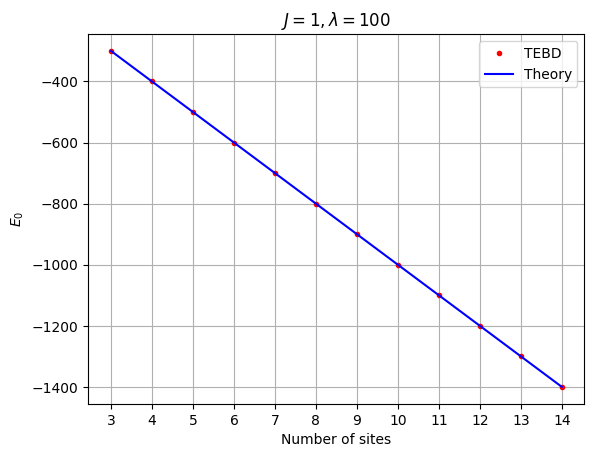

In [16]:
plt.plot(Ns, energies_N_lmda_100, 'ro', markersize=3, label="TEBD")
plt.plot(Ns, energies_theor_ext_field, "b-", label="Theory")
plt.xlabel("Number of sites")
plt.ylabel("$E_0$")
plt.xticks(Ns)
plt.legend()
plt.title(f"$J = 1, \lambda={model_params['lmda']}$")
plt.grid()
plt.savefig('../figures/energy_vs_N_lambda_100.png', bbox_inches='tight', dpi=300);

Again, the results follow the theoretical expectation in the large $\lambda$ limit.

## Effect of Bond Dimension

In [17]:
d = 2
N = 10

In [18]:
model_params = {}

In [19]:
num_iter = 210
mid_steps = 10

In [20]:
bond_dims = [2, 10, 20]

In [21]:
iterations = range(0, num_iter, mid_steps)

In [22]:
energies_bond_dims = np.zeros((len(bond_dims), len(iterations)))

for i in tqdm(range(len(bond_dims))):
    observables_at_midsteps = run_tebd(
        model_name, model_params, N, bond_dim=bond_dims[i], num_iter=num_iter, mid_steps=mid_steps,
        observables=observables, print_to_stdout=False
    )
    energies_bond_dims[i] = observables_at_midsteps['energy']

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [01:16<00:00, 25.38s/it]


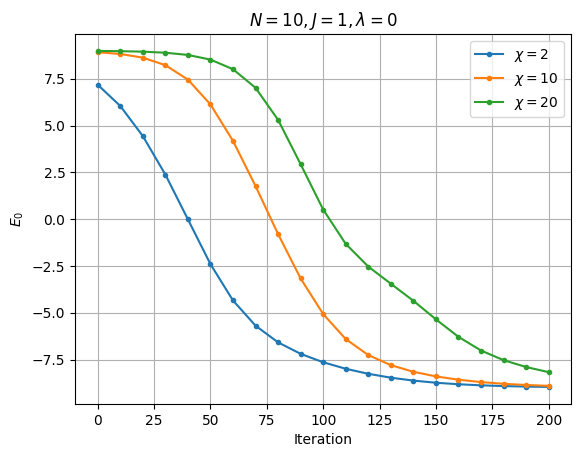

In [23]:
plt.plot(iterations, energies_bond_dims[0], 'o-', markersize=3, label=f"$\chi = {bond_dims[0]}$")
plt.plot(iterations, energies_bond_dims[1], 'o-', markersize=3, label=f"$\chi = {bond_dims[1]}$")
plt.plot(iterations, energies_bond_dims[2], 'o-', markersize=3, label=f"$\chi = {bond_dims[2]}$")
plt.xlabel("Iteration")
plt.ylabel("$E_0$")
plt.legend()
plt.title("$N=10, J=1, \lambda=0$")
plt.grid()
plt.savefig('../figures/energy_vs_iterations_diff_bond_dim.png', bbox_inches='tight', dpi=300);

As the bond dimension increases, the number of iterations to converge usually increases.

## Effect of $J$

In [24]:
Js = [-2, -1, 1, 2]

In [25]:
energies_J = np.zeros((len(Js), len(iterations)))

for i in tqdm(range(len(Js))):
    model_params = {'J': Js[i]}
    observables_at_midsteps = run_tebd(
        model_name, model_params, N, num_iter=num_iter, mid_steps=mid_steps, observables=observables,
        print_to_stdout=False
    )
    energies_J[i] = observables_at_midsteps['energy']

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:04<00:00,  1.05s/it]


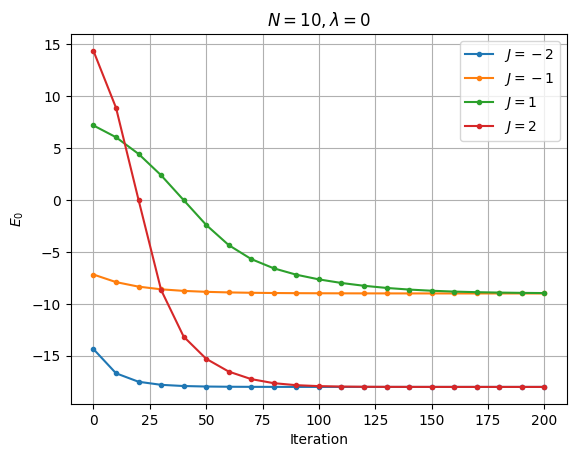

In [26]:
plt.plot(iterations, energies_J[0], 'o-', markersize=3, label=f"$J={Js[0]}$")
plt.plot(iterations, energies_J[1], 'o-', markersize=3, label=f"$J={Js[1]}$")
plt.plot(iterations, energies_J[2], 'o-', markersize=3, label=f"$J={Js[2]}$")
plt.plot(iterations, energies_J[3], 'o-', markersize=3, label=f"$J={Js[3]}$")
plt.xlabel("Iteration")
plt.ylabel("$E_0$")
plt.legend()
plt.title("$N=10, \lambda=0$")
plt.grid()
plt.savefig('../figures/energy_vs_iterations_diff_J.png', bbox_inches='tight', dpi=300);

The energy converges to the same value if $|J|$ is the same. The energy is lower if $|J|$ is greater.

## Effect of Suzuki-Trotter Decomposition

In [27]:
st_orders = ["ST1", "ST2"]

In [28]:
model_params = {}

In [31]:
energies_st_orders = np.zeros((len(st_orders), len(iterations)))

for i in tqdm(range(len(st_orders))):
    observables_at_midsteps = run_tebd(
        model_name, model_params, N, num_iter=num_iter, mid_steps=mid_steps, st_order=st_orders[i],
        observables=observables, print_to_stdout=False, rng_seed=1
    )
    energies_st_orders[i] = np.real(observables_at_midsteps['energy'])

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.16s/it]


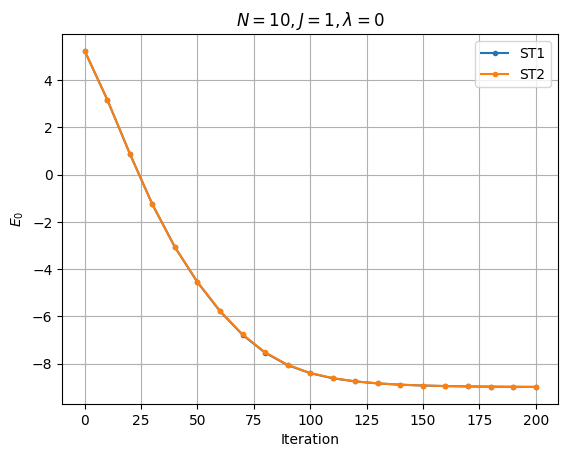

In [32]:
plt.plot(iterations, energies_st_orders[0], 'o-', markersize=3, label=st_orders[0])
plt.plot(iterations, energies_st_orders[1], 'o-', markersize=3, label=st_orders[1])
plt.xlabel("Iteration")
plt.ylabel("$E_0$")
plt.legend()
plt.title("$N= 10, J = 1, \lambda=0$")
plt.grid()
plt.savefig('../figures/energy_vs_iterations_diff_st_order.png', bbox_inches='tight', dpi=300);

The results are inconclusive.

## Entropy

Get entropy for a specific initial state.

In [33]:
N = 10
bond_dim = 2
num_iter = 210
mid_steps = 10

In [34]:
initial_state = '0111111111'

In [35]:
model_params = {}

In [36]:
observables = ['entropy']

In [37]:
observables_at_midsteps = run_tebd(
    model_name, model_params, N, bond_dim=bond_dim, num_iter=num_iter, mid_steps=mid_steps, observables=observables,
    print_to_stdout=False, initial_state=initial_state
)

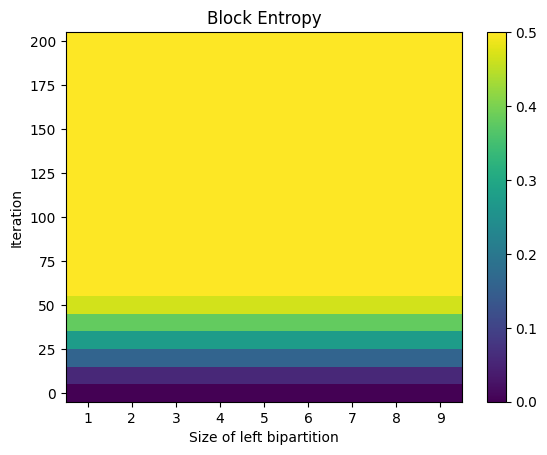

In [38]:
plt.pcolormesh(range(1, N), range(0, num_iter, mid_steps), observables_at_midsteps['entropy'])
plt.set_cmap('viridis')
plt.colorbar()
plt.title('Block Entropy')
plt.ylabel('Iteration')
plt.xlabel('Size of left bipartition')
plt.clim([0, 0.5]);

Get entropy for a random state.

In [39]:
observables_at_midsteps = run_tebd(
    model_name, model_params, N, bond_dim=bond_dim, num_iter=num_iter, mid_steps=mid_steps, observables=observables,
    print_to_stdout=False, rng_seed=1
)

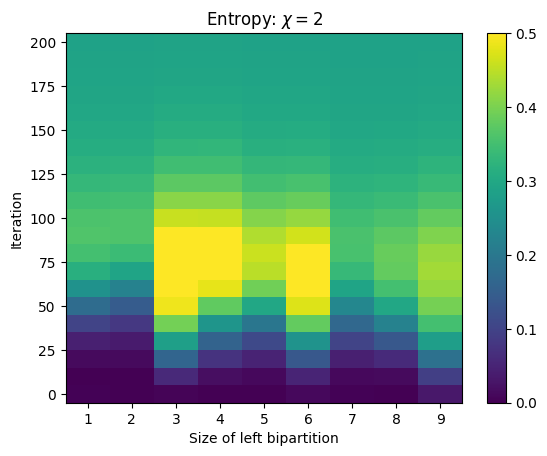

In [40]:
plt.pcolormesh(range(1, N), range(0, num_iter, mid_steps), observables_at_midsteps['entropy'])
plt.set_cmap('viridis')
plt.colorbar()
plt.title('Entropy: $\chi = 2$')
plt.ylabel('Iteration')
plt.xlabel('Size of left bipartition')
plt.clim([0, 0.5]);

Increase bond dimension.

In [41]:
bond_dim = 10

In [42]:
observables_at_midsteps = run_tebd(
    model_name, model_params, N, bond_dim=bond_dim, num_iter=num_iter, mid_steps=mid_steps, observables=observables,
    print_to_stdout=False, rng_seed=1
)

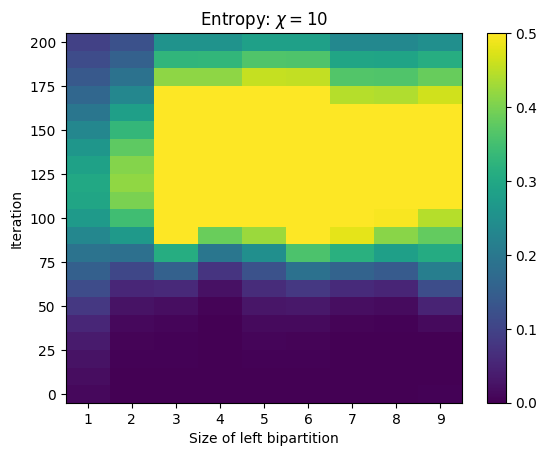

In [43]:
plt.pcolormesh(range(1, N), range(0, num_iter, mid_steps), observables_at_midsteps['entropy'])
plt.set_cmap('viridis')
plt.colorbar()
plt.title('Entropy: $\chi = 10$')
plt.ylabel('Iteration')
plt.xlabel('Size of left bipartition')
plt.clim([0, 0.5]);

## Magnetization

In [44]:
N = 3

In [45]:
lmdas = np.logspace(-4, 3, 20)

In [46]:
observables = ['magnetization']

In [47]:
magnetization_lmda = np.zeros(len(lmdas))

for i in tqdm(range(len(lmdas))):
    model_params = {'lmda': lmdas[i]}
    observables_at_midsteps = run_tebd(
        model_name, model_params, N, observables=observables, print_to_stdout=False
    )
    magnetization_lmda[i] = observables_at_midsteps['magnetization'][-1]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:05<00:00,  3.54it/s]


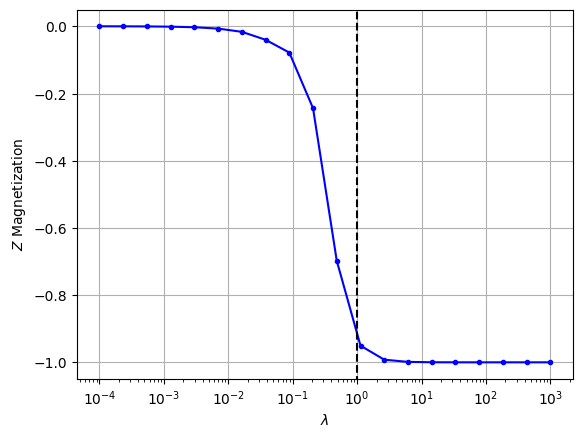

In [48]:
plt.plot(lmdas, magnetization_lmda, 'bo-', markersize=3)
plt.plot([1, 1], [-2, 2], 'k--')
plt.gca().set_xscale("log")
plt.xlabel("$\lambda$")
plt.ylabel("$Z$ Magnetization")
plt.ylim([-1.05, 0.05])
plt.grid()
plt.savefig('../figures/z_magnetization_vs_lambda.png', bbox_inches='tight', dpi=300);